In [2]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Semester 3/Matkul Machine Learning/Praktikum/3/Data/socr (1).csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
# mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [5]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [6]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                      "Weight(Pounds)": "berat_kg"})

    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
        berat_kg=lambda d: d["berat_kg"] * 0.45359237
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [7]:
from sklearn.model_selection import train_test_split

X = df1[["tinggi_cm"]]
y = df1["berat_kg"]
x_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg): ", model.intercept_)
print("R2 (test): ", r2)
print("MAE (kg): ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg): ", rmse)

Koefisien (kg per cm): 0.5518232618278286
Intersep (kg):  -37.657088783833586
R2 (test):  0.24989263013277574
MAE (kg):  3.6704107898943548
RMSE (kg):  4.609006140308042


In [10]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


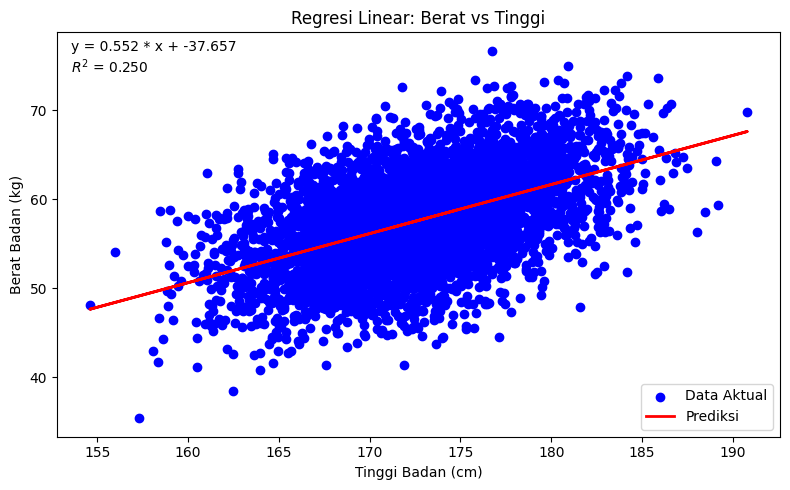

In [11]:
import matplotlib.pyplot as plt
# Plot data scatter

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
# Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Berat Badan (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prekdiksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]
# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil


,Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


In [15]:
import pandas as pd

# Read the CSV file whith a comma delimiter
df = pd.read_csv('/content/gdrive/MyDrive/Semester 3/Matkul Machine Learning/Praktikum/3/Data/stunting_wasting_dataset (1).csv')

#cetak header data (5 baris data) dari file
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [16]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [17]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin": "jk", "Umur (bulan)":"Umur_bln",
                        "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())
## Laki-laki: 1, Perempuan: 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,Umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [18]:
# Hitung matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        jk  Umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
Umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


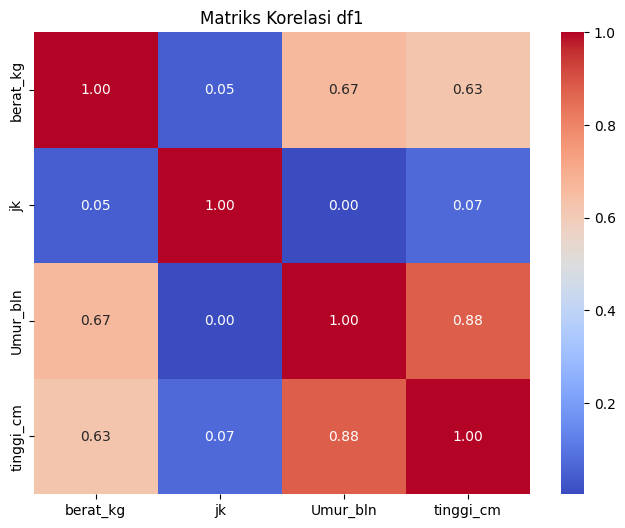

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

y = df1["berat_kg"]

X = df1[["Umur_bln", "tinggi_cm"]]

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42 # random_state supaya hasil konsisten
)

## cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

## Cetak Pembagian Data
X_train.head()

Jumlah data train : 80000
Jumlah data test : 20000


,Umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [21]:
import statsmodels.api as sm

## Tambahkan konstanta
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,Umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [22]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_umur = model.params['Umur_bln']
x2_tinggi = model.params['tinggi_cm']
#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-----------------------------
const        2.545617
Umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-----------------------------
y = 2.546 + 0.230*x1 + 0.054*x2


In [23]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:37:19   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [24]:
X_test_const = sm.add_constant(X_test)

y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    "Umur (bulan)": X_test["Umur_bln"].to_numpy(),
    "Tinggi Badan (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1- (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi Badan (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845
